In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ocsvm_linear_df = pd.read_csv('./ocsvm-linear.csv')
ocsvm_poly_df = pd.read_csv('./ocsvm-poly.csv')
ocsvm_rbf_df = pd.read_csv('./ocsvm-rbf.csv')
ocsvm_sigmoid_df = pd.read_csv('./ocsvm-sigmoid.csv')

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_4545/3642236208.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


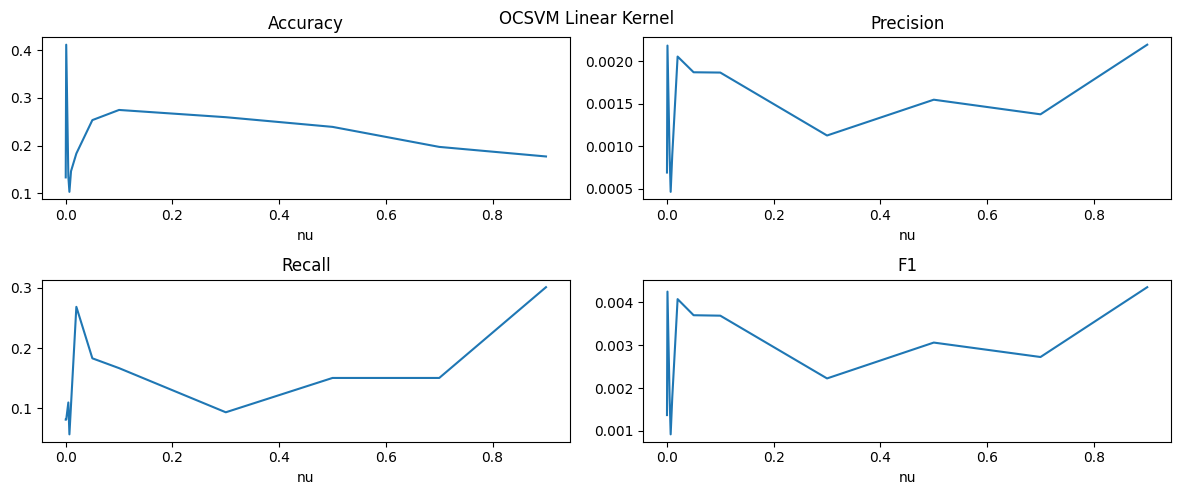

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

ax[0, 0].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['accuracy'])
ax[0, 0].set_title("Accuracy")
ax[0, 0].set_xlabel('nu')
ax[0, 1].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['precision'])
ax[0, 1].set_title("Precision")
ax[0, 1].set_xlabel('nu')
ax[1, 0].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['recall'])
ax[1, 0].set_title("Recall")
ax[1, 0].set_xlabel('nu')
ax[1, 1].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['f1'])
ax[1, 1].set_title("F1")
ax[1, 1].set_xlabel('nu')

fig.tight_layout()
fig.suptitle("OCSVM Linear Kernel")
fig.show()

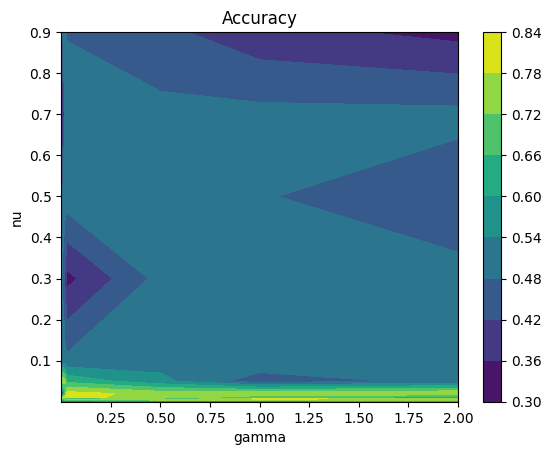

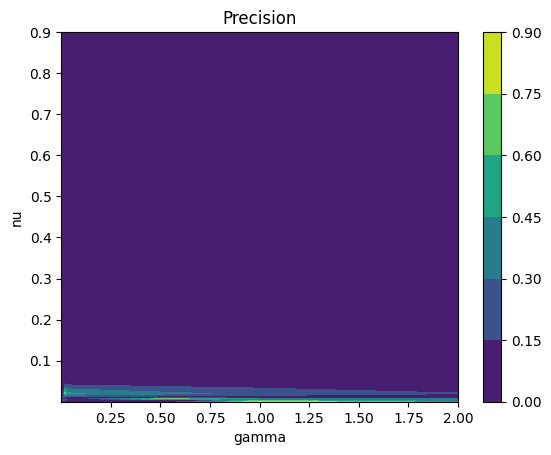

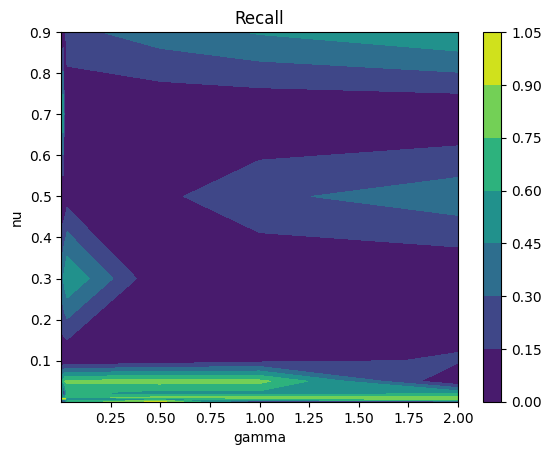

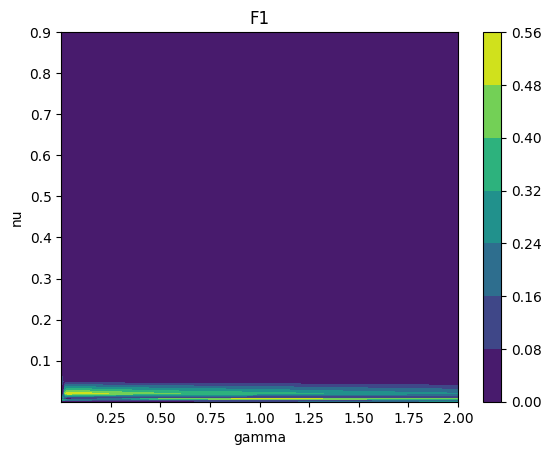

In [46]:
ocsvm_sigmoid_df = ocsvm_sigmoid_df.sort_values(by=['gamma', 'nu'])
X, Y = ocsvm_sigmoid_df['gamma'].to_numpy(), ocsvm_sigmoid_df['nu'].to_numpy()
X = np.unique(X)
Y = np.unique(Y)

Z = ocsvm_sigmoid_df['accuracy'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Accuracy')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_sigmoid_df['precision'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Precision')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_sigmoid_df['recall'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Recall')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_sigmoid_df['f1'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('F1')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

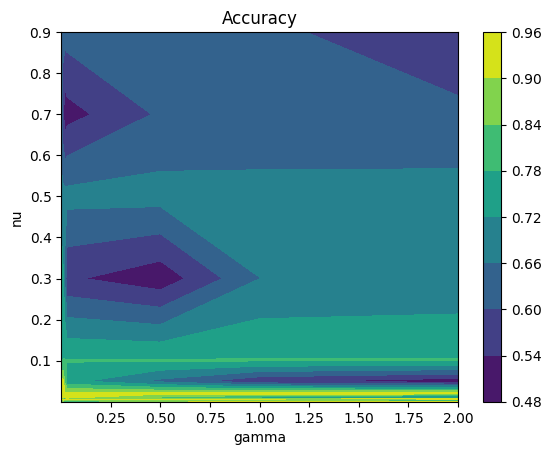

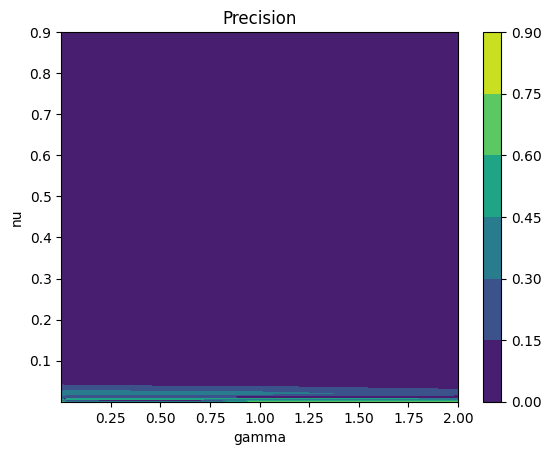

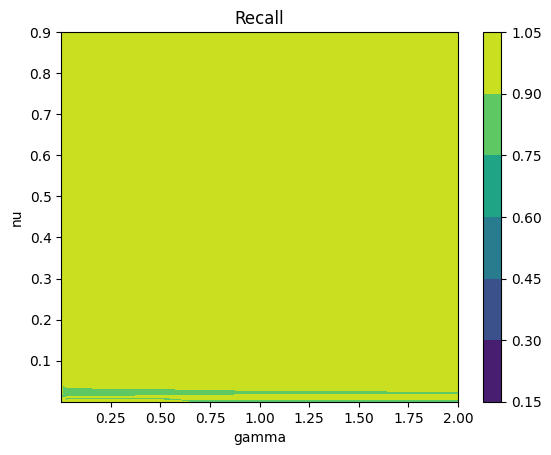

TypeError: Length of x (2) must match number of columns in z (7)

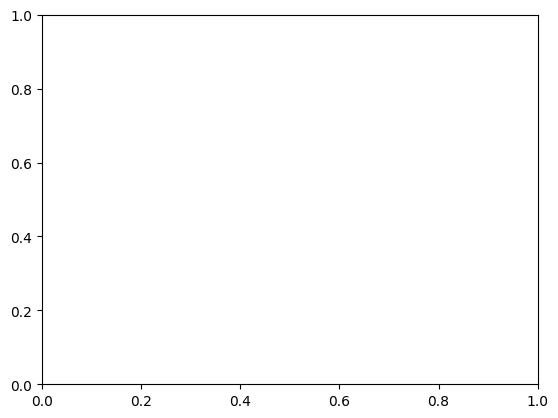

In [50]:
ocsvm_rbf_df = ocsvm_rbf_df.sort_values(by=['gamma', 'nu'])
X, Y = ocsvm_rbf_df['gamma'].to_numpy(), ocsvm_rbf_df['nu'].to_numpy()
X = np.unique(X)
Y = np.unique(Y)

Z = ocsvm_rbf_df['accuracy'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Accuracy')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_rbf_df['precision'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Precision')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_rbf_df['recall'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Recall')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

# CROP USELESS AREAS (WHERE SCORE IS TOO LOW)
Z = ocsvm_rbf_df['f1'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('F1')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()